## Edge detection in Emojis

We will use filters to extract important features in images, for example edges.

In this notebook we explore applying filters with the Pillow package using 
    various kernels.

This may lead us to gain higher prediction accuracy by removing noisy features 
    in images with a good filter and by applying it to our data before fitting. 

In [1]:
# Libraries
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt

# Larger plots
plt.rcParams["figure.figsize"]=20,20

In [2]:
# Functions
def edge_detection(image_path):
    """
    This function takes an image path and returns a new image with edges highlighted.
    """
    img = Image.open(image_path)
    grayscale = img.convert('L')
    edges = grayscale.filter(ImageFilter.FIND_EDGES)
    return edges

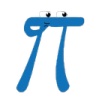

In [3]:
# Load image
img = Image.open('images/thinking/pi.png')
display(img)

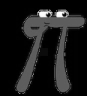

In [4]:
# Convert the image to grayscale
img_grayscale = img.convert('L')
display(img_grayscale)


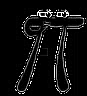

In [5]:
# Outline edges
img_edges = img_grayscale.filter(ImageFilter.FIND_EDGES)
display(img_edges)

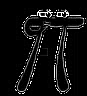

In [6]:
# Using shortcut edge_detection function
display(
    edge_detection('images/thinking/pi.png')
)

### Manually choosing image filter kernel

In [7]:
# Filter parameters
img = Image.open('images/hmmm/family-two-thumbs-up.png')
img_grayscale = img.convert('L')

kernel_shape = (3, 3)
top_edges_kernel = ( 
    2, 2, 2,
    0, 0, 0,
    -2, -2, -2
)
bottom_edges_kernel = ( 
    -2, -2, -2,
    0, 0, 0,
    2, 2, 2
)
left_edges_kernel = (
    -2, 0, 2,
    -2, 0, 2,
    -2, 0, 2
)
right_edges_kernel = ( 
    2, 0, -2,
    2, 0, -2,
    2, 0, -2
)

In [8]:
# Filter images
img00 = img_grayscale.filter(
    ImageFilter.Kernel(
        kernel_shape,
        top_edges_kernel,
        scale=1,
        offset=0
    )
)
img01 = img_grayscale.filter(
    ImageFilter.Kernel(
        kernel_shape,
        bottom_edges_kernel,
        scale=1,
        offset=0
    )
)
img10 = img_grayscale.filter(
    ImageFilter.Kernel(
        kernel_shape,
        left_edges_kernel,
        scale=1,
        offset=0
    )
)
img11 = img_grayscale.filter(
    ImageFilter.Kernel(
        kernel_shape,
        right_edges_kernel,
        scale=1,
        offset=0
    )
)

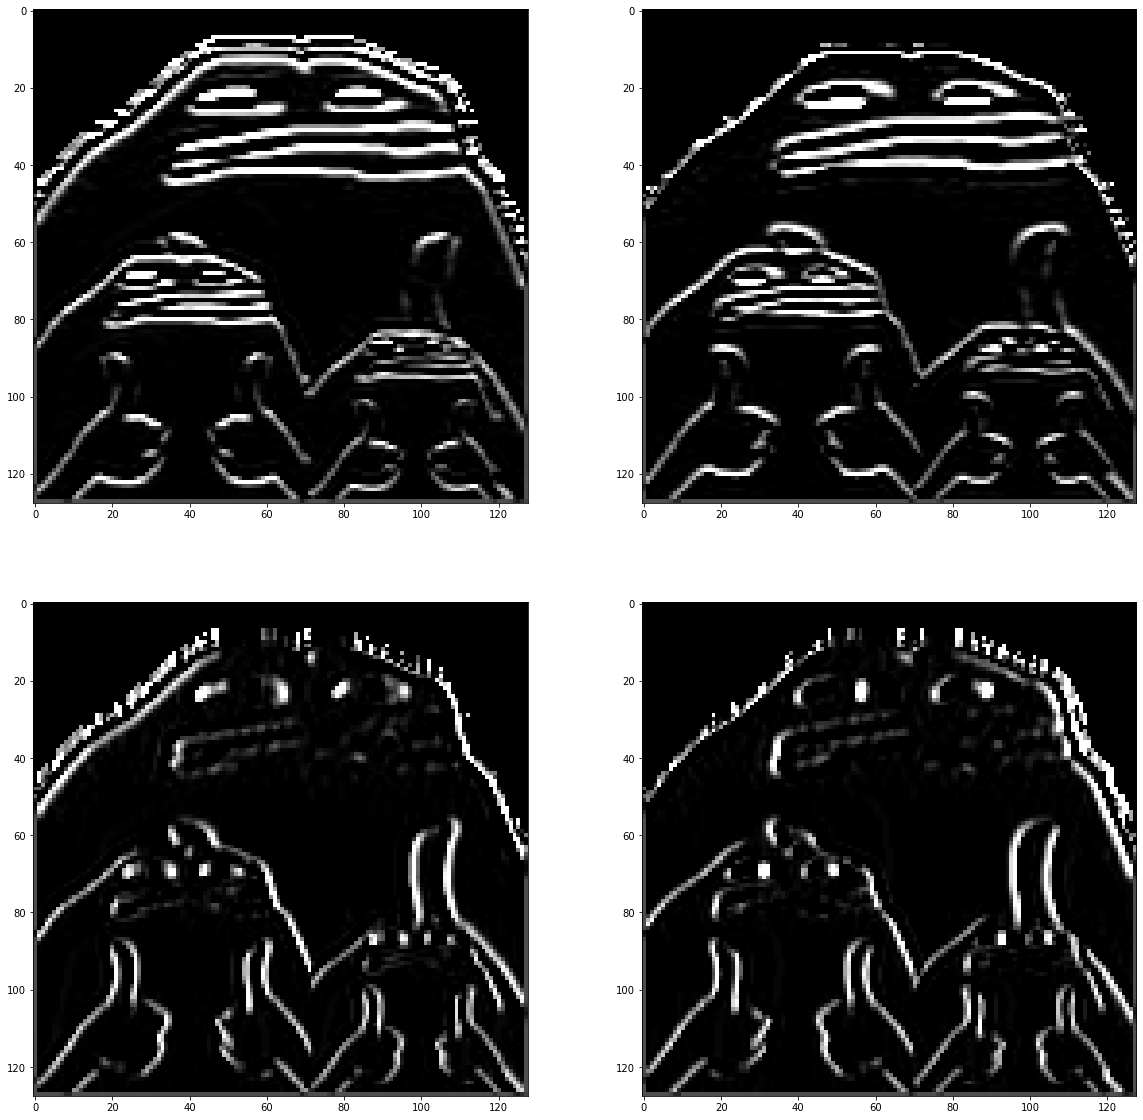

In [12]:
# Plot images  
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(img00, cmap='gray')
axs[0, 1].imshow(img01, cmap='gray')
axs[1, 0].imshow(img10, cmap='gray')
axs[1, 1].imshow(img11, cmap='gray')
plt.show()

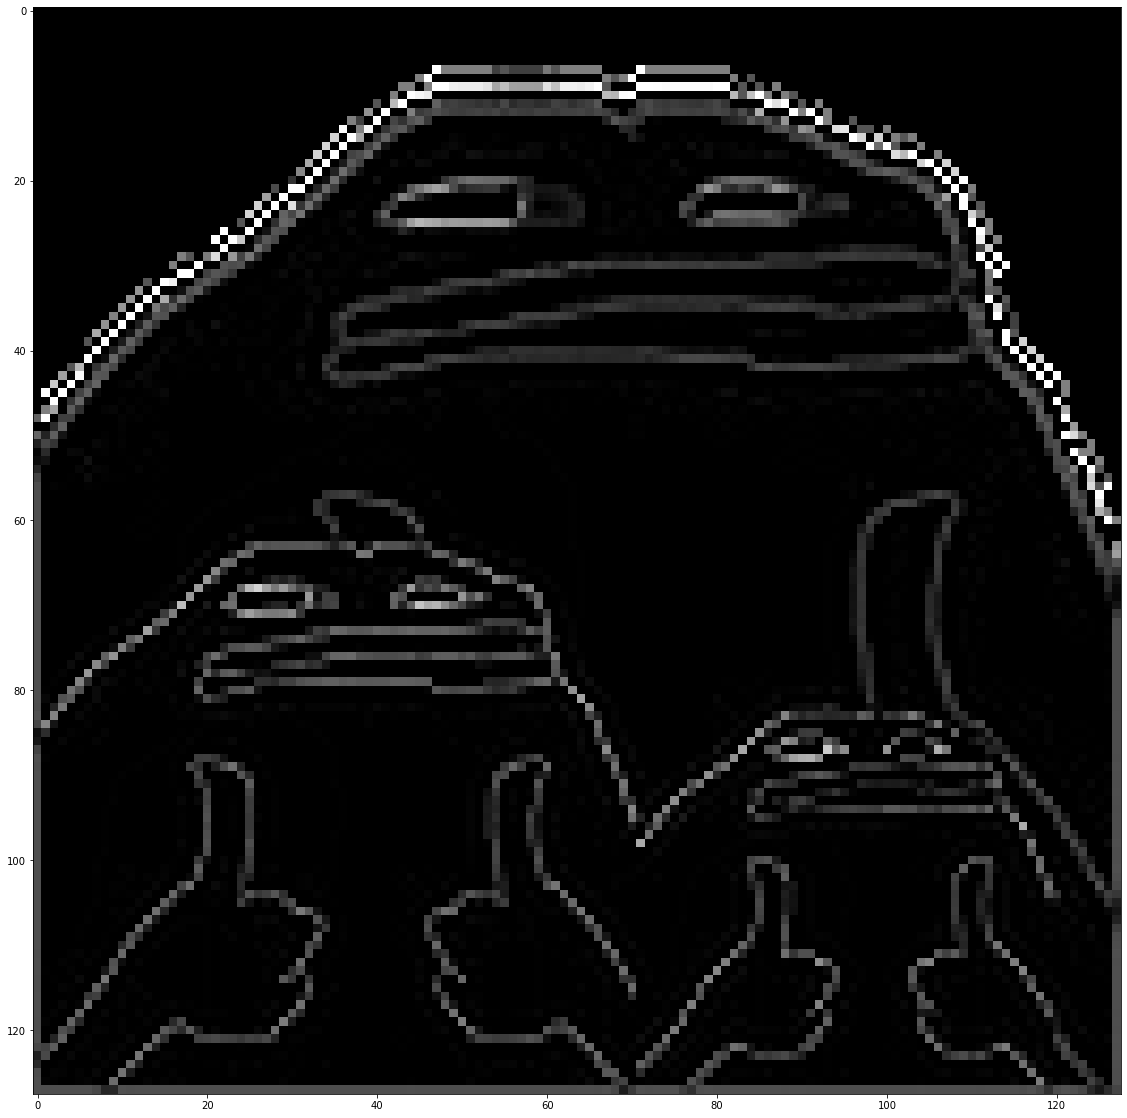

In [11]:
# Custom kernel
hard_edges = img_grayscale.filter(
    ImageFilter.Kernel(
        (3, 3),
        ( 
            0, 1, 0,
            1, -4, 1,
            0, 1, 0
        ),
        scale=1,
        offset=0
    )
)
plt.imshow(hard_edges, cmap='gray')
plt.show()